# Step 1 :Library Import

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Step 2 : Data Import

In [2]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Machine Learning---- Python\Projects\HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,4,Single,5993,19479,Yes,11,3,8,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,2,Married,5130,24907,No,23,4,10,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,3,Single,2090,2396,Yes,15,3,7,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,Married,2909,23159,Yes,11,3,8,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,2,Married,3468,16632,No,12,3,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,...,4,Married,2571,12290,No,17,3,17,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,...,1,Married,9991,21457,No,15,3,9,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,...,2,Married,6142,5174,Yes,20,4,6,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,...,2,Married,5390,13243,No,14,3,17,9,0


# Step 3 : Data Pre-Processing

In [3]:
data = data.drop(['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime','JobRole'], axis = 1)
data

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,1102,1,2,94,4,5993,19479,11,3,8,6,0
1,49,No,279,8,3,61,2,5130,24907,23,4,10,10,1
2,37,Yes,1373,2,4,92,3,2090,2396,15,3,7,0,0
3,33,No,1392,3,4,56,3,2909,23159,11,3,8,8,3
4,27,No,591,2,1,40,2,3468,16632,12,3,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,3,41,4,2571,12290,17,3,17,5,0
1466,39,No,613,6,4,42,1,9991,21457,15,3,9,7,1
1467,27,No,155,4,2,87,2,6142,5174,20,4,6,6,0
1468,49,No,1023,2,4,63,2,5390,13243,14,3,17,9,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   DailyRate                1470 non-null   int64 
 3   DistanceFromHome         1470 non-null   int64 
 4   EnvironmentSatisfaction  1470 non-null   int64 
 5   HourlyRate               1470 non-null   int64 
 6   JobSatisfaction          1470 non-null   int64 
 7   MonthlyIncome            1470 non-null   int64 
 8   MonthlyRate              1470 non-null   int64 
 9   PercentSalaryHike        1470 non-null   int64 
 10  PerformanceRating        1470 non-null   int64 
 11  TotalWorkingYears        1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 16

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.728571,6502.931293,14313.103401,15.209524,3.153741,11.279592,7.008163,2.187755
std,9.135373,403.509100,8.106864,1.093082,20.329428,1.102846,4707.956783,7117.786044,3.659938,0.360824,7.780782,6.126525,3.222430
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,11.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,12.000000,3.000000,6.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,4.000000,8379.000000,20461.500000,18.000000,3.000000,15.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,26999.000000,25.000000,4.000000,40.000000,40.000000,15.000000


In [6]:
data.isna().sum()

Age                        0
Attrition                  0
DailyRate                  0
DistanceFromHome           0
EnvironmentSatisfaction    0
HourlyRate                 0
JobSatisfaction            0
MonthlyIncome              0
MonthlyRate                0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64

# Step 4 : Treatment Of Outliers

<AxesSubplot:>

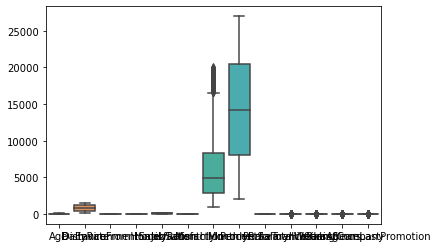

In [7]:
sns.boxplot(data = data)

In [8]:
def outliers(data):
    a = data.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data[i] = np.where(data[i]>upper_limit,upper_limit,data[i])
        data[i] = np.where(data[i]<lower_limit,lower_limit,data[i])

In [9]:
outliers(data)

In [10]:
data.Attrition.value_counts(dropna=False)

No     1233
Yes     237
Name: Attrition, dtype: int64

# Step 5 : Converting Category To Numeric Using Label Encoder

In [11]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Attrition
0,Yes
1,No
2,Yes


In [12]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [13]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1102.0,1.0,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,49.0,279.0,8.0,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,37.0,1373.0,2.0,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0


In [14]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,1,41.0,1102.0,1.0,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,0,49.0,279.0,8.0,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,1,37.0,1373.0,2.0,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0
3,0,33.0,1392.0,3.0,4.0,56.0,3.0,2909.0,23159.0,11.0,3.0,8.0,8.0,3.0
4,0,27.0,591.0,2.0,1.0,40.0,2.0,3468.0,16632.0,12.0,3.0,6.0,2.0,2.0


# Step 6 : Data Partition

In [15]:
from sklearn.model_selection import train_test_split

x = Final_combined.drop('Attrition', axis = 1)
y = Final_combined[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)

# Step 7 : Model building

In [16]:
X_train.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
1361,26.0,1096.0,6.0,3.0,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0
610,27.0,269.0,5.0,3.0,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0
542,38.0,168.0,1.0,3.0,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0
950,31.0,587.0,2.0,4.0,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5
344,35.0,1296.0,5.0,3.0,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train[0:5]

array([[-1.2040943 ,  0.71805839, -0.39474037,  0.24933733, -0.2501365 ,
         1.12904603, -0.86965676, -1.03019527,  0.74833077,  0.        ,
        -0.42062363,  0.09022567,  2.05636516],
       [-1.09311265, -1.34576133, -0.51748355,  0.24933733, -1.18491655,
         1.12904603,  1.4865469 , -0.78701633,  0.20121421,  0.        ,
        -0.28281798,  0.49443665, -0.77867051],
       [ 0.12768552, -1.59781186, -1.00845624,  0.24933733,  0.7338425 ,
         0.20954594,  0.35091367,  0.12909742, -0.34590235,  0.        ,
        -0.14501232, -1.12240728, -0.77867051],
       [-0.64918604, -0.55217648, -0.88571306,  1.16279745, -0.4469323 ,
         0.20954594,  0.80796759, -0.77401883,  1.02188905,  0.        ,
        -0.14501232,  0.69654214,  2.25886771],
       [-0.20525943,  1.21716836, -0.51748355,  0.24933733, -0.20093755,
        -0.70995415,  0.4046307 ,  0.52978363, -0.61946063,  0.        ,
         0.81962723,  1.90917509, -0.77867051]])

In [21]:
model = KNeighborsClassifier(n_neighbors=6)
## Fit the model on the training data.
model.fit(X_train, y_train)

C:\Users\akash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [24]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,-1.204094,0.718058,-0.394740,0.249337,-0.250136,1.129046,-0.869657,-1.030195,0.748331,0.0,-0.420624,0.090226,2.056365,1.0
1,-1.093113,-1.345761,-0.517484,0.249337,-1.184917,1.129046,1.486547,-0.787016,0.201214,0.0,-0.282818,0.494437,-0.778671,0.0
2,0.127686,-1.597812,-1.008456,0.249337,0.733843,0.209546,0.350914,0.129097,-0.345902,0.0,-0.145012,-1.122407,-0.778671,1.0
3,-0.649186,-0.552176,-0.885713,1.162797,-0.446932,0.209546,0.807968,-0.774019,1.021889,0.0,-0.145012,0.696542,2.258868,0.0
4,-0.205259,1.217168,-0.517484,0.249337,-0.200938,-0.709954,0.404631,0.529784,-0.619461,0.0,0.819627,1.909175,-0.778671,0.0


In [23]:
X_train=pd.DataFrame(X_train,columns=['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction','HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'])
X_train.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,-1.204094,0.718058,-0.394740,0.249337,-0.250136,1.129046,-0.869657,-1.030195,0.748331,0.0,-0.420624,0.090226,2.056365
1,-1.093113,-1.345761,-0.517484,0.249337,-1.184917,1.129046,1.486547,-0.787016,0.201214,0.0,-0.282818,0.494437,-0.778671
2,0.127686,-1.597812,-1.008456,0.249337,0.733843,0.209546,0.350914,0.129097,-0.345902,0.0,-0.145012,-1.122407,-0.778671
3,-0.649186,-0.552176,-0.885713,1.162797,-0.446932,0.209546,0.807968,-0.774019,1.021889,0.0,-0.145012,0.696542,2.258868
4,-0.205259,1.217168,-0.517484,0.249337,-0.200938,-0.709954,0.404631,0.529784,-0.619461,0.0,0.819627,1.909175,-0.778671


# Step 8 : Prediction On Train Data

In [36]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,-1.204094,0.718058,-0.394740,0.249337,-0.250136,1.129046,-0.869657,-1.030195,0.748331,0.0,-0.420624,0.090226,2.056365,0
1,-1.093113,-1.345761,-0.517484,0.249337,-1.184917,1.129046,1.486547,-0.787016,0.201214,0.0,-0.282818,0.494437,-0.778671,0
2,0.127686,-1.597812,-1.008456,0.249337,0.733843,0.209546,0.350914,0.129097,-0.345902,0.0,-0.145012,-1.122407,-0.778671,0
3,-0.649186,-0.552176,-0.885713,1.162797,-0.446932,0.209546,0.807968,-0.774019,1.021889,0.0,-0.145012,0.696542,2.258868,0
4,-0.205259,1.217168,-0.517484,0.249337,-0.200938,-0.709954,0.404631,0.529784,-0.619461,0.0,0.819627,1.909175,-0.778671,0


In [37]:
X_train.reset_index(drop=True, inplace=True)

In [38]:
train['Predicted']=model.predict(X_train)
train.head()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
0,-1.204094,0.718058,-0.394740,0.249337,-0.250136,1.129046,-0.869657,-1.030195,0.748331,0.0,-0.420624,0.090226,2.056365,0,0
1,-1.093113,-1.345761,-0.517484,0.249337,-1.184917,1.129046,1.486547,-0.787016,0.201214,0.0,-0.282818,0.494437,-0.778671,0,0
2,0.127686,-1.597812,-1.008456,0.249337,0.733843,0.209546,0.350914,0.129097,-0.345902,0.0,-0.145012,-1.122407,-0.778671,0,0
3,-0.649186,-0.552176,-0.885713,1.162797,-0.446932,0.209546,0.807968,-0.774019,1.021889,0.0,-0.145012,0.696542,2.258868,0,0
4,-0.205259,1.217168,-0.517484,0.249337,-0.200938,-0.709954,0.404631,0.529784,-0.619461,0.0,0.819627,1.909175,-0.778671,0,0


In [39]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       986
           1       0.79      0.10      0.18       190

    accuracy                           0.85      1176
   macro avg       0.82      0.55      0.55      1176
weighted avg       0.84      0.85      0.80      1176



### Accuracy Of Train Dataset Is 85%.

# Step 8 : Prediction On Test Data

In [ ]:
X_test=pd.DataFrame(X_test,columns=['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction','HourlyRate', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'])
X_test.head()

In [29]:
y_test.reset_index(drop=True, inplace=True)

In [30]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,-0.538204,-1.727580,0.464462,0.249337,0.537047,-0.709954,-0.823974,-0.998191,1.295447,0.0,-1.247458,-0.920302,0.031340,0
1,1.792410,1.566545,-0.394740,-0.664123,-1.578508,0.209546,-0.924292,0.219940,1.295447,0.0,0.268405,0.090226,0.841350,0
2,0.238667,-0.487292,-0.394740,1.162797,-1.184917,-1.629454,0.839876,0.976031,-0.072344,0.0,-0.282818,0.090226,-0.373665,0
3,-0.316241,0.406115,-1.008456,1.162797,-0.102540,0.209546,0.172316,-0.305410,-0.345902,0.0,-0.145012,0.696542,2.258868,0
4,1.459465,-1.186046,1.569150,0.249337,1.078235,1.129046,1.854532,1.394327,-0.619461,0.0,2.404392,2.313386,2.258868,0


In [31]:
test['Predicted']=model.predict(X_test)
test.head()

C:\Users\akash\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
0,-0.538204,-1.727580,0.464462,0.249337,0.537047,-0.709954,-0.823974,-0.998191,1.295447,0.0,-1.247458,-0.920302,0.031340,0,0
1,1.792410,1.566545,-0.394740,-0.664123,-1.578508,0.209546,-0.924292,0.219940,1.295447,0.0,0.268405,0.090226,0.841350,0,0
2,0.238667,-0.487292,-0.394740,1.162797,-1.184917,-1.629454,0.839876,0.976031,-0.072344,0.0,-0.282818,0.090226,-0.373665,0,0
3,-0.316241,0.406115,-1.008456,1.162797,-0.102540,0.209546,0.172316,-0.305410,-0.345902,0.0,-0.145012,0.696542,2.258868,0,0
4,1.459465,-1.186046,1.569150,0.249337,1.078235,1.129046,1.854532,1.394327,-0.619461,0.0,2.404392,2.313386,2.258868,0,0


In [32]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       247
           1       0.14      0.02      0.04        47

    accuracy                           0.82       294
   macro avg       0.49      0.50      0.47       294
weighted avg       0.73      0.82      0.76       294



### Accuracy Of Test Dataset Is 82%. So We Can Say That Our Model Is Good Fit.

# Finish..!